# Logistic Regression

Implement Logistic Regression

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from typing import Tuple

%matplotlib widget

## Data

In [53]:
np.random.seed(42)

In [125]:
# One Variable 
x_train = np.array([0., 1, 2, 3, 4, 5]) 
y_train = np.array([0,  0, 0, 1, 1, 1])

# Two Variable 
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

# Circle
np.random.seed(42)
N = 100  # Number of Points
radius = 5 


# Generate random (x, y) points within a larger square
x1 = np.random.uniform(-radius * 1.5, radius * 1.5, N)
x2 = np.random.uniform(-radius * 1.5, radius * 1.5, N)

X_circle = np.column_stack((x1, x2)) 

print(X_circle.shape)
# Compute distance from origin
dist = np.sqrt(x1**2 + x2**2)

# Classify: Inside the circle (yes = 1), Outside the circle (no = 0)
y_circle = (dist < radius).astype(int)



(100, 2)


In [3]:
def plot_2_variable_data(X_data : np.ndarray, y_data : np.ndarray, ax : Axes) -> Axes:

  yes = y_data == 0
  no = y_data == 1

  yes_x_1, yes_x_2 = X_data[yes].T
  no_x_1, no_x_2 = X_data[no].T

  ax.scatter(yes_x_1, yes_x_2, marker='x', s=100, c='red', label='y=1')
  ax.scatter(no_x_1, no_x_2, marker='o', s=100, label='y=0')

  return ax

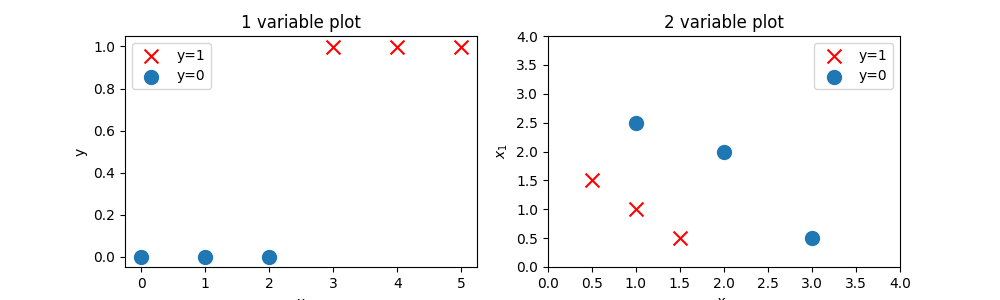

In [126]:
yes = y_train == 1
no = y_train == 0

fig,ax= plt.subplots(1, 2, figsize=(10, 3))


ax[0].scatter(x_train[yes], y_train[yes], marker='x', s=100, c='red', label='y=1')
ax[0].scatter(x_train[no], y_train[no], marker='o', s=100, label='y=0')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('1 variable plot')
ax[0].legend()

ax[1] = plot_2_variable_data(X_train2, y_train2, ax[1])
ax[1].axis([0, 4, 0, 4])
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_1$')
ax[1].set_title('2 variable plot')
ax[1].legend()

plt.show()




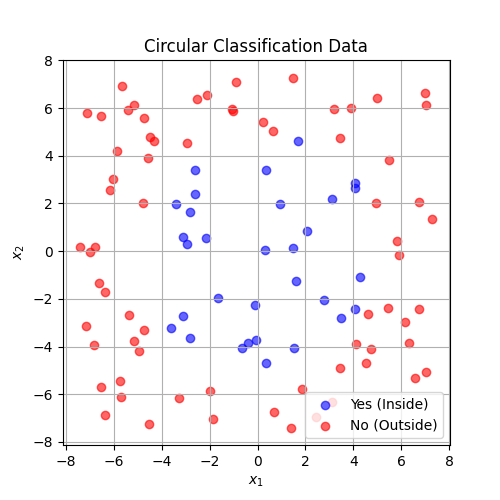

In [127]:
# Plot the data
plt.figure(figsize=(5,5))
plt.scatter(x1[y_circle == 1], x2[y_circle == 1], color="blue", alpha=0.6, label="Yes (Inside)")
plt.scatter(x1[y_circle == 0], x2[y_circle == 0], color="red", alpha=0.6, label="No (Outside)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Circular Classification Data")
plt.legend()
plt.grid()
plt.axis("equal")  # Keeps aspect ratio correct
plt.show()

## Functions

In [113]:
def g_z(z : float) -> float:
  return 1.0 / (1 + np.exp(-z))

In [131]:

def f_line(x_vec: np.ndarray, w_vec : np.ndarray, b : float) -> float:
  z = np.dot(w_vec, x_vec) + b
  return g_z(z)

def f_circle(x_vec: np.ndarray, w_vec : np.ndarray, b : float) -> float:
  return g_z(w_vec[0] * (x_vec[0] ** 2) + w_vec[1] * (x_vec[1] ** 2) - b)

def fwb_x(x_vec: np.ndarray, w_vec : np.ndarray, b : float) -> float:
  # return f_line(x_vec, w_vec, b)
  return f_circle(x_vec, w_vec, b)


We change the function above depending on if we need a decision boundary as a line vs a circle

In [116]:
def J_wb(x_vec : np.ndarray, y_vec : np.ndarray, w_vec : np.ndarray, b : float):
  m = y_vec.shape[0]

  my_sum = 0
  for i in range(m):
    result_fwb_x = fwb_x(x_vec[i], w_vec, b)
    yes_section = y_vec[i] * np.log(result_fwb_x)
    no_section = (1 - y_vec[i]) * np.log(1 - result_fwb_x)
    my_sum += yes_section + no_section
  
  return (-1.0 / m) * my_sum 




In [ ]:
def d_d_J(x_vec : np.ndarray, y_vec : np.ndarray, w_vec : np.ndarray, b: float) -> Tuple[np.ndarray, float]:
  m = y_vec.shape[0]

  d_dw_sums = np.zeros(w_vec.shape[0]) 
  d_db_sum = 0
  for i in range(m):
    result_fwb_x = fwb_x(x_vec[i], w_vec, b)
    diff = result_fwb_x - y_vec[i]

    d_dw_sums += diff * x_vec[i]
    d_db_sum += diff

  return (1.0 / m) * d_dw_sums, (1.0 / m) * d_db_sum



In [118]:
def gradient_descent(x_vec : np.ndarray, y_vec : np.ndarray, starting_w_vec: np.ndarray, starting_b : float, alpha : float, num_of_iterations : int = 10):
  ITERATIONS = num_of_iterations

  w_vec = np.copy(starting_w_vec)
  b = starting_b

  costs = []

  for i in range(ITERATIONS):
    costs.append(J_wb(x_vec, y_vec, w_vec, b))

    d_dws, d_db = d_d_J(x_vec, y_vec, w_vec, b)

    w_vec = w_vec - (alpha * d_dws)
    b = b - (alpha * d_db)

    print(f"Iteration {i+1}: w_vec = {w_vec}, b = {b}")
    print(f"Cost: {costs[-1]}")

  
  return costs, w_vec, b


# Use Functions

## One Variable Gradient Descent

In [10]:
x_train_1d = np.expand_dims(x_train, axis=1)
starting_w_vec_1 = [0]

### Finding right alpha

In [11]:
def plot_cost_per_alpha(alpha : int, ax : Axes):
  NUM_OF_ITERATIONS = 20
  costs, w_vec, b = gradient_descent(x_train_1d, y_train, starting_w_vec_1, 0, alpha, NUM_OF_ITERATIONS)
  ax.scatter(range(1, len(costs) + 1), costs)
  ax.set_xlabel('Iterations')
  ax.set_ylabel('Cost')
  ax.set_title(f'Cost for alpha={alpha}')

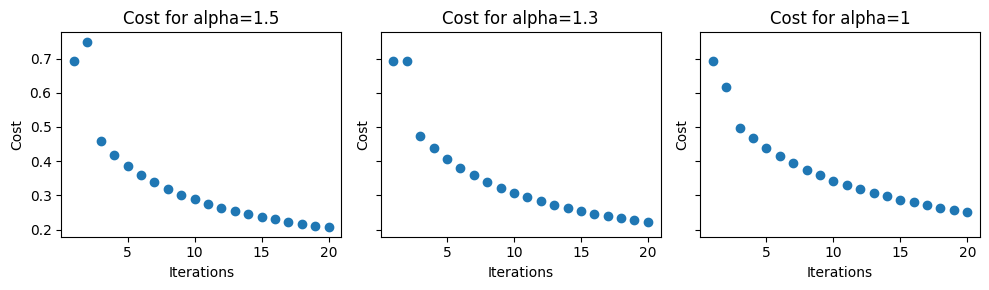

In [12]:
fig,ax= plt.subplots(1, 3, figsize=(10, 3), sharex=True, sharey=True)

alphas = [1.5, 1.3, 1]

for i, alpha in enumerate(alphas):
  plot_cost_per_alpha(alpha, ax[i])

plt.tight_layout()
plt.show()

In [13]:
ALPHA = 1

We choose **&alpha; = 1** as it is the largest alpha that will produce a cost that always goes down 

### Running Gradient Descent

In [14]:
NUM_OF_ITERATIONS = 150
costs, w_vec, b = gradient_descent(x_train_1d, y_train, starting_w_vec_1, 0, ALPHA, NUM_OF_ITERATIONS)

Final cost:  0.09144877352804318


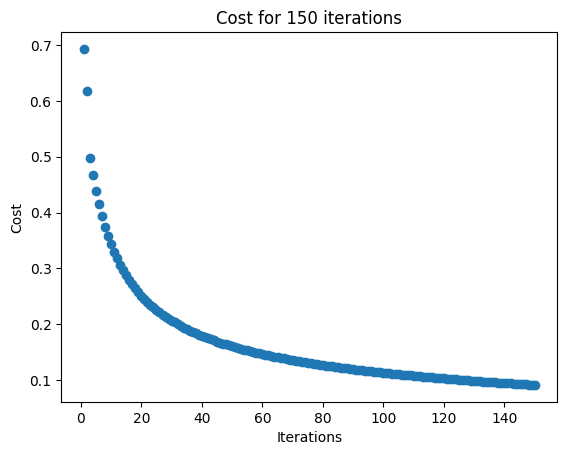

In [15]:
print("Final cost: ", costs[-1])
plt.scatter(range(1, len(costs) + 1), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title(f"Cost for {NUM_OF_ITERATIONS} iterations")
plt.show()

From observing the graph above, the gradient descent is producing diminishing returns. Our final cost is **0.091** 
which is pretty dang good. We will proceed with the weight and bias produced

In [16]:
print(f'w: {w_vec}')
print(f'b: {b}')

w: [2.57092833]
b: -6.163357735026824


**Decision Boundary**

$$
w_1 x_1 + b = 0
$$

$$
x_1 = -\frac{b}{w_1}
$$

In [17]:
sigmoid_function_x = np.linspace(np.min(x_train), np.max(x_train), 500)
sigmoid_function_y = [] 
for x in sigmoid_function_x:
  sigmoid_function_y.append(fwb_x(x, w_vec, b))

decision_boundary_x = -b / w_vec

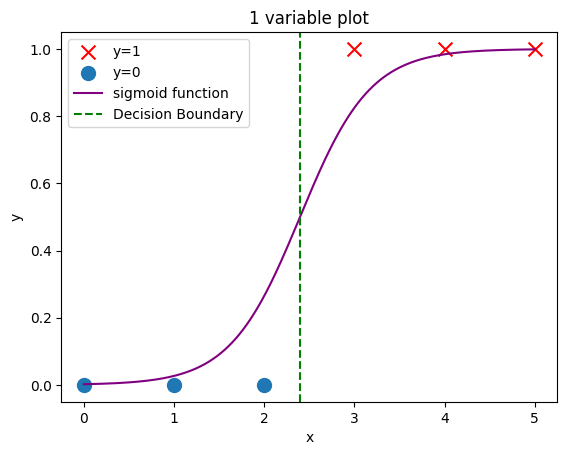

In [18]:
yes = y_train == 1
no = y_train == 0

plt.scatter(x_train[yes], y_train[yes], marker='x', s=100, c='red', label='y=1')
plt.scatter(x_train[no], y_train[no], marker='o', s=100, label='y=0')


plt.plot(sigmoid_function_x, sigmoid_function_y, color="purple", label='sigmoid function')
plt.axvline(decision_boundary_x, color='green', linestyle='--', label='Decision Boundary')

plt.xlabel('x')
plt.ylabel('y')
plt.title('1 variable plot')
plt.legend()

## 2 Variable Logistic Regression

In [19]:
starting_w_vec_2 = np.zeros(X_train2.shape[1])
print(starting_w_vec_2)

[0. 0.]


In [20]:
def plot_cost_per_alpha2(alpha : int, ax : Axes):
  NUM_OF_ITERATIONS = 10
  costs, w_vec, b = gradient_descent(X_train2, y_train2, starting_w_vec_2, 0, alpha, NUM_OF_ITERATIONS)
  ax.scatter(range(1, len(costs) + 1), costs)
  ax.set_xlabel('Iterations')
  ax.set_ylabel('Cost')
  ax.set_title(f'Cost for alpha={alpha}')

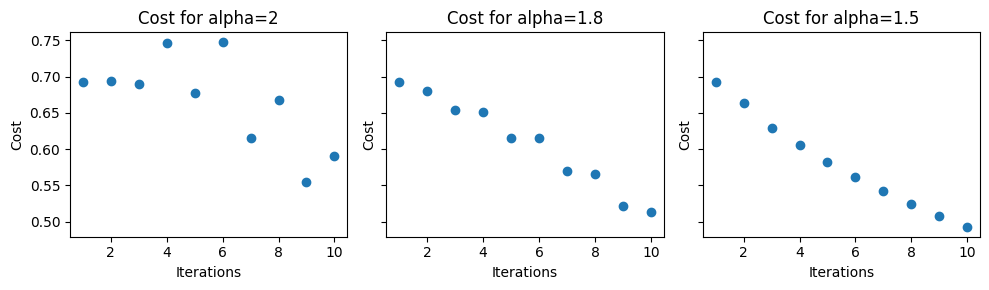

In [21]:
fig,ax= plt.subplots(1, 3, figsize=(10, 3), sharex=True, sharey=True)

alphas = [2, 1.8, 1.5]

for i, alpha in enumerate(alphas):
  plot_cost_per_alpha2(alpha, ax[i])

plt.tight_layout()
plt.show()

In [22]:
ALPHA = 1.8

We choose **&alpha;=1.8** as it is the largest alpha that produces costs that consistenetly lower

### Running Gradient Descent

In [23]:
NUM_OF_ITERATIONS = 500
costs, w_vec, b = gradient_descent(X_train2, y_train2, starting_w_vec_2, 0, ALPHA, NUM_OF_ITERATIONS)

Final cost:  0.018994457624535513


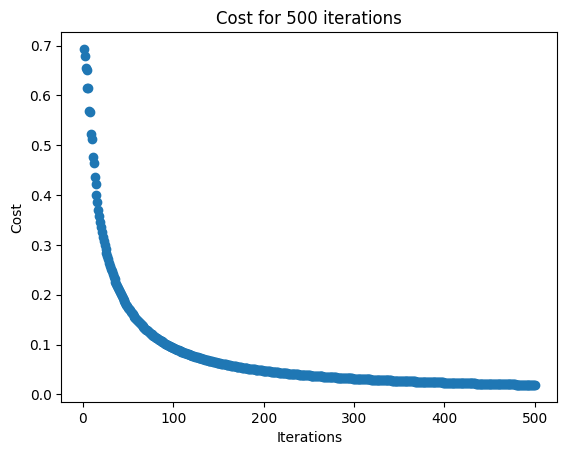

In [24]:
print("Final cost: ", costs[-1])
plt.scatter(range(1, len(costs) + 1), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title(f"Cost for {NUM_OF_ITERATIONS} iterations")
plt.show()

Final Cost of 0.03 looking excellent. We see that the cost has tapered off as well through the graph above

In [25]:
print(f'w: {w_vec}')
print(f'b: {b}')

w: [5.14574233 4.94236769]
b: -13.847798818238253


**Decision Boundary**

$$
w_2 x_2 + w_1 x_1 + b = 0
$$

$$
x_2 = -\frac{w_1}{w_2} - \frac{b}{w_2}
$$

In [26]:
x1_vec = X_train2.T[0]
decision_boundary_x = np.linspace(np.min(x1_vec), np.max(x1_vec), 500)
decision_boundary_y = [] 
for x in decision_boundary_x:
  decision_boundary_y.append((( -1.0 * w_vec[0] / w_vec[1]) * x) - (b / w_vec[1]))

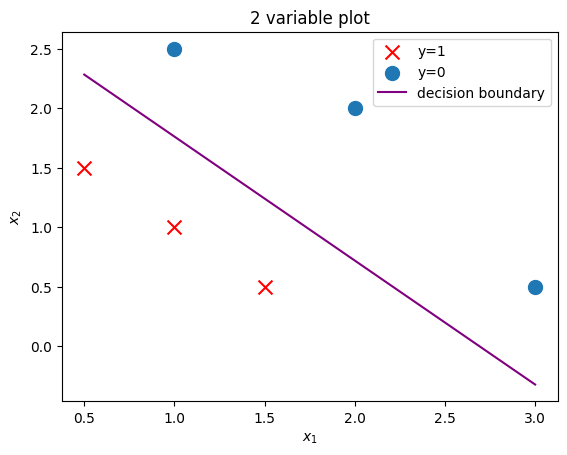

In [27]:
fig,ax= plt.subplots()
plot_2_variable_data(X_train2, y_train2, ax)
plt.plot(decision_boundary_x, decision_boundary_y, color="purple", label='decision boundary')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('2 variable plot')
plt.legend()
plt.show()


In [38]:
x1_vec = X_train2.T[0]
x2_vec = X_train2.T[1]

x1_smooth = np.linspace(np.min(x1_vec), np.max(x1_vec), 100)
x2_smooth = np.linspace(np.min(x2_vec), np.max(x2_vec), 100)

X1, X2 = np.meshgrid(x1_smooth, x2_smooth)

Z = g_z(w_vec[0] * X1 + w_vec[1] * X2 + b)


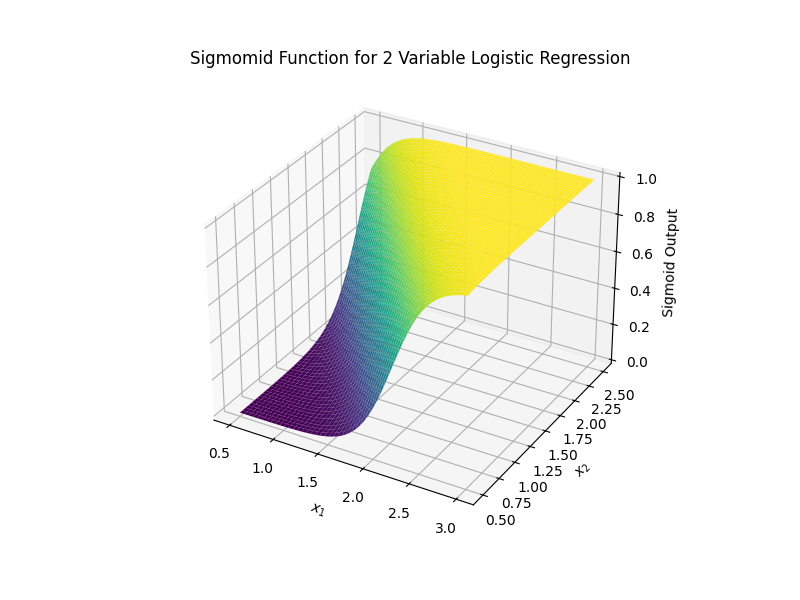

In [39]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X1, X2, Z, cmap='viridis')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('Sigmoid Output')
ax.set_title('Sigmomid Function for 2 Variable Logistic Regression')

plt.show()

## Circular Logistic Equation

In [128]:
starting_w_vec_2 = np.random.randn(X_circle.shape[1]) * 0.01 
print(starting_w_vec_2)

[-0.00680025  0.00232254]


In [129]:
def plot_cost_per_alpha_circle(alpha : int, ax : Axes):
  NUM_OF_ITERATIONS = 10
  costs, w_vec, b = gradient_descent(X_circle, y_circle, starting_w_vec_2, 0, alpha, NUM_OF_ITERATIONS)
  print(f'w_vec: {w_vec}')
  print(f'b: {b}')
  ax.scatter(range(1, len(costs) + 1), costs)
  ax.set_xlabel('Iterations')
  ax.set_ylabel('Cost')
  ax.set_title(f'Cost for alpha={alpha}')

w_vec: [-0.00677606  0.00230957]
b: -1.6740162767060764e-05


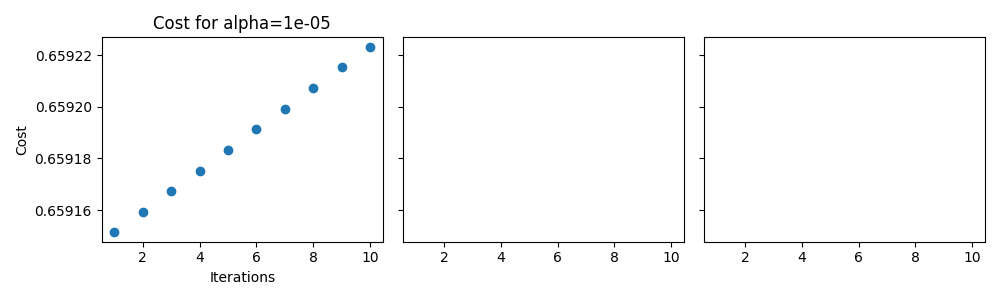

In [130]:
fig,ax= plt.subplots(1, 3, figsize=(10, 3), sharex=True, sharey=True)

alphas = [0.00001]

for i, alpha in enumerate(alphas):
  plot_cost_per_alpha_circle(alpha, ax[i])

plt.tight_layout()
plt.show()

[[-1.88189822 -7.02856221]
 [ 6.7607146   2.04615617]
 [ 3.47990913 -2.78466028]
 [ 1.47987726  0.12856037]
 [-5.15972039  6.11349711]
 [-5.16008219 -3.76061656]
 [-6.62874582 -1.34425615]
 [ 5.49264219  3.83326708]
 [ 1.51672518 -4.06802752]
 [ 3.12108867 -6.34530135]
 [-7.19123259 -3.15372821]
 [ 7.04864778 -5.08168069]
 [ 4.98663961  6.44546479]
 [-4.31491334  4.62180569]
 [-4.77262549  2.00105635]
 [-4.74893235  5.57190885]
 [-2.93636636  4.55508115]
 [ 0.37134647 -4.70144912]
 [-1.02082472  5.88838498]
 [-3.1315629   0.59013363]
 [ 1.67779342  4.61160233]
 [-5.40759209  5.9413695 ]
 [-3.11783027 -2.72994788]
 [-2.00457235 -5.84922113]
 [-0.65895024 -4.08097256]
 [ 4.27763942 -1.09338317]
 [-4.50489327  4.77022149]
 [ 0.21351658  5.41095875]
 [ 1.38621853 -7.39571804]
 [-6.80324381  0.16120954]
 [ 1.61317278 -1.23883495]
 [-4.94213814 -4.16838284]
 [-6.52422611 -5.70201949]
 [ 6.73328306 -2.43577243]
 [ 6.9844805   6.64364556]
 [ 4.62596022 -2.65195602]
 [-2.93079346  0.28185933]
 

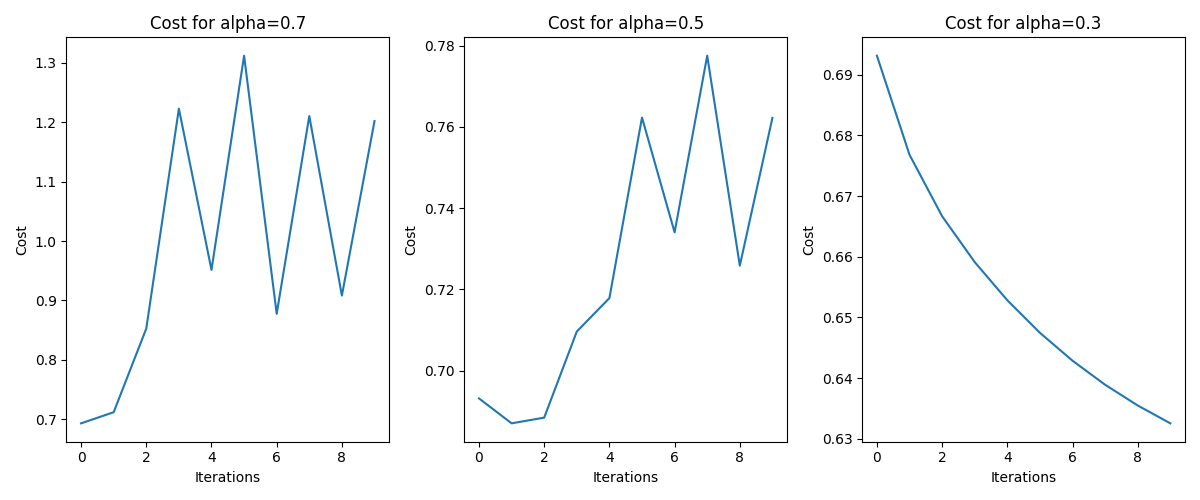

In [142]:
# import numpy as np
# import matplotlib.pyplot as plt
# from typing import Tuple

# # Generate the data
# np.random.seed(42)  # For reproducibility
# N = 1000  # Number of data points
# radius = 5

# # Randomly sample points within a square of side 10
# x1 = np.random.uniform(-radius * 1.5, radius * 1.5, N)
# x2 = np.random.uniform(-radius * 1.5, radius * 1.5, N)

# # Create the feature matrix with quadratic features
# X_circle = np.array([[x1[i], x2[i], x1[i]**2, x2[i]**2] for i in range(N)])

# # Create labels (1 for inside the circle, 0 for outside)
# y_circle = np.array([1 if (x1[i]**2 + x2[i]**2) <= radius**2 else 0 for i in range(N)])

print(X_circle)

# Sigmoid function
def g_z(z: float) -> float:
    return 1.0 / (1 + np.exp(-z))

# Prediction function for the logistic regression model with quadratic terms
def f_circle(x_vec: np.ndarray, w_vec: np.ndarray, b: float) -> float:
    return g_z(np.dot(w_vec, x_vec) + b)

# Cost function (logistic loss)
def J_wb(x_vec: np.ndarray, y_vec: np.ndarray, w_vec: np.ndarray, b: float) -> float:
    m = y_vec.shape[0]
    cost_sum = 0
    for i in range(m):
        prediction = f_circle(x_vec[i], w_vec, b)
        cost_sum += y_vec[i] * np.log(prediction) + (1 - y_vec[i]) * np.log(1 - prediction)
    return (-1.0 / m) * cost_sum

# Gradient of the cost function (derivatives of J_wb)
def d_d_J(x_vec: np.ndarray, y_vec: np.ndarray, w_vec: np.ndarray, b: float) -> Tuple[np.ndarray, float]:
    m = y_vec.shape[0]
    d_dw_sums = np.zeros(w_vec.shape[0])
    d_db_sum = 0
    for i in range(m):
        prediction = f_circle(x_vec[i], w_vec, b)
        diff = prediction - y_vec[i]
        d_dw_sums += diff * x_vec[i]
        d_db_sum += diff
    return (1.0 / m) * d_dw_sums, (1.0 / m) * d_db_sum

# Gradient descent optimization
def gradient_descent(x_vec: np.ndarray, y_vec: np.ndarray, starting_w_vec: np.ndarray, starting_b: float, alpha: float, num_of_iterations: int = 1000):
    w_vec = np.copy(starting_w_vec)
    b = starting_b
    costs = []
    for i in range(num_of_iterations):
        costs.append(J_wb(x_vec, y_vec, w_vec, b))
        d_dw_sums, d_db_sum = d_d_J(x_vec, y_vec, w_vec, b)
        w_vec -= alpha * d_dw_sums
        b -= alpha * d_db_sum
    return costs, w_vec, b

# Plot the cost function per iteration
def plot_cost_per_alpha_circle(alpha: float, ax: plt.Axes):
    starting_w_vec = np.zeros(X_circle.shape[1])
    starting_b = 0
    costs, w_vec, b = gradient_descent(X_circle, y_circle, starting_w_vec, starting_b, alpha, 10)
    ax.plot(range(len(costs)), costs)
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(f'Cost for alpha={alpha}')
    print(f'Final weights: {w_vec}')
    print(f'Final bias: {b}')

# Create the subplots
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
alphas = [0.7, 0.5, 0.3]

# Plot the cost function for different alphas
for i, alpha in enumerate(alphas):
    plot_cost_per_alpha_circle(alpha, ax[i])

plt.tight_layout()
plt.show()


In [ ]:
ALPHA = 0.3

In [ ]:
NUM_OF_ITERATIONS = 500
costs, w_vec, b = gradient_descent(X_circle, y_circle, starting_w_vec_2, 0, ALPHA, NUM_OF_ITERATIONS)

Final cost:  0.018994457624535513


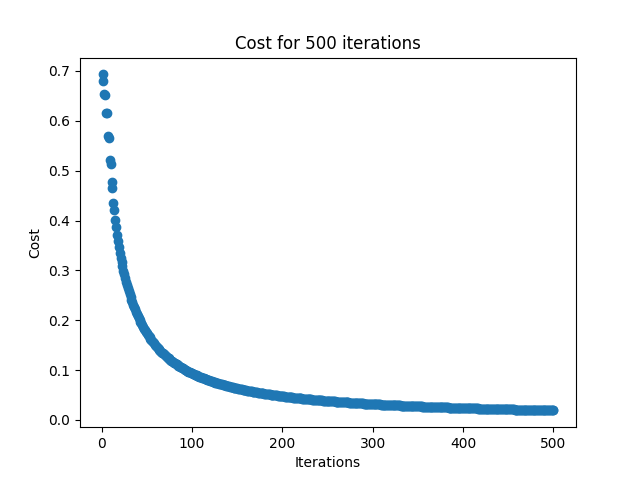

In [ ]:
print("Final cost: ", costs[-1])
plt.clf()
plt.scatter(range(1, len(costs) + 1), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title(f"Cost for {NUM_OF_ITERATIONS} iterations")
plt.show()

In [163]:
print(w_vec, b)

[5.14574233 4.94236769] -13.847798818238253


In [ ]:
x1_vec = X_circle.T[0]
decision_boundary_x = np.linspace(np.min(x1_vec), np.max(x1_vec), 500)
decision_boundary_y = [] 
for x in decision_boundary_x:
  inside = (-1.0 * w_vec[0] * (x ** 2)) - b
    
  # Ensure the inside term is non-negative (it must represent a valid point on the circle)
  decision_boundary_y.append(np.sqrt(inside) / w_vec[1])  # Upper half
  decision_boundary_y.append(-np.sqrt(inside) / w_vec[1])  # Lower half

print(decision_boundary_y)

[np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(na

/var/folders/8b/t09q3t6971lddvsclckgbm0m0000gp/T/ipykernel_2324/2106509646.py:8: RuntimeWarning: invalid value encountered in sqrt
  decision_boundary_y.append(np.sqrt(inside) / w_vec[1])  # Upper half
/var/folders/8b/t09q3t6971lddvsclckgbm0m0000gp/T/ipykernel_2324/2106509646.py:9: RuntimeWarning: invalid value encountered in sqrt
  decision_boundary_y.append(-np.sqrt(inside) / w_vec[1])  # Lower half


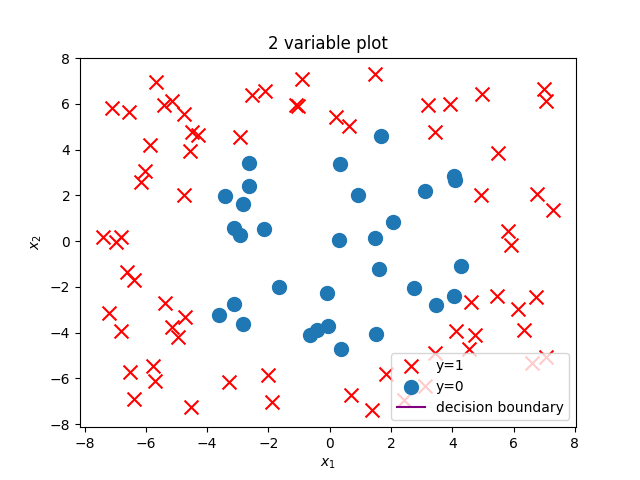

In [177]:
fig,ax= plt.subplots()
plot_2_variable_data(X_circle, y_circle, ax)
plt.plot(decision_boundary_x, decision_boundary_y[:len(decision_boundary_x)], color="purple", label='decision boundary')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('2 variable plot')
plt.legend()
plt.show()